
<h1 style="border: 2px solid black; padding: 15px; border-radius: 12px;" align='center'>Cours IA et Applications</h1>    

<h2 align='center'> Deep Learning : filtres et convolution </h2>

<h3 align='center'> Jordy Palafox </h3>
<h3 align='center'> Ing2 GSI/MI - 2023/2024 </h3>
      
      
<div style="display:flex"> 
    <img src="cytech.png", style="width:250px;height:50"> 
    <img src="cy.jpg", style="width:300px;height:100px"> 
</div> 

Dans ce notebook, on va juste réaliser quelques tests en appliquant sur une image des filtres.

On va suivre l'exemple donné dans le lien suivant :

https://plainenglish.io/blog/image-filtering-and-editing-in-python-with-code-e878d2a4415d

https://datacorner.fr/image-processing-6/

In [5]:
# Chargement des libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# On va d'abprd voir les effets de la convolution sur une image basique avant de faire sur une photo

In [9]:
def affichage_deux_imgs(img1, img2):
    _, axes = plt.subplots(ncols=2)
    axes[0].imshow(img1, cmap=plt.get_cmap('gray'))
    axes[1].imshow(img2, cmap=plt.get_cmap('gray'))

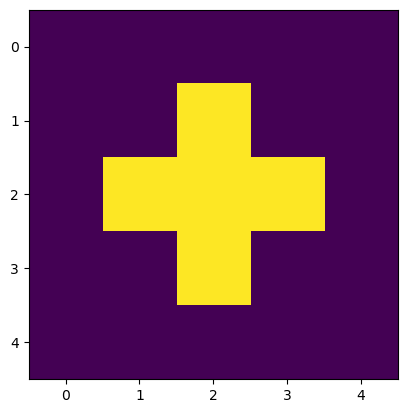

In [10]:
image_basique = np.array([[0,0,0,0,0],[0,0,1,0,0], [0,1,1,1,0],[0,0,1,0,0],[0,0,0,0,0]])

plt.imshow(image_basique)

In [11]:
noyau = np.ones((3,3), np.float32)/2

print(noyau)

[[0.5 0.5 0.5]
 [0.5 0.5 0.5]
 [0.5 0.5 0.5]]


In [15]:
# Voyons l'effet du noyau sur l'image 

img_convoluée = signal.convolve2d(image_basique,
                                noyau, # noyau de convolution
                                mode='same', # paramètre pour conserver la même taille d'image
                                boundary="fill", # remplit les bords de sorte à conserver la même taille
                                fillvalue = 0 # valeur de remplissage des bords 
                                )

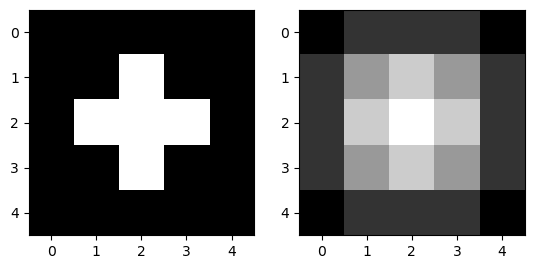

In [16]:
affichage_deux_imgs(image_basique, img_convoluée)

Voici les coefficients de l'image convoluée

In [21]:
img_convoluée

array([[0. , 0.5, 0.5, 0.5, 0. ],
       [0.5, 1.5, 2. , 1.5, 0.5],
       [0.5, 2. , 2.5, 2. , 0.5],
       [0.5, 1.5, 2. , 1.5, 0.5],
       [0. , 0.5, 0.5, 0.5, 0. ]])

# Passons à une image réelle 

In [46]:
# Lecture de l'image
img = cv2.imread("cat.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Fixes color read issue

In [18]:
img.shape

(511, 272, 3)

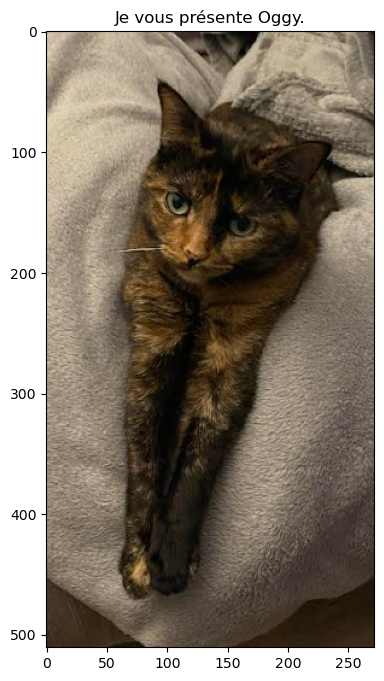

In [19]:
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.title('Je vous présente Oggy.')
plt.show()

## Flou

cv2 comporte un certain nombre de flitres, blur permet de rendre l'image floue !

https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

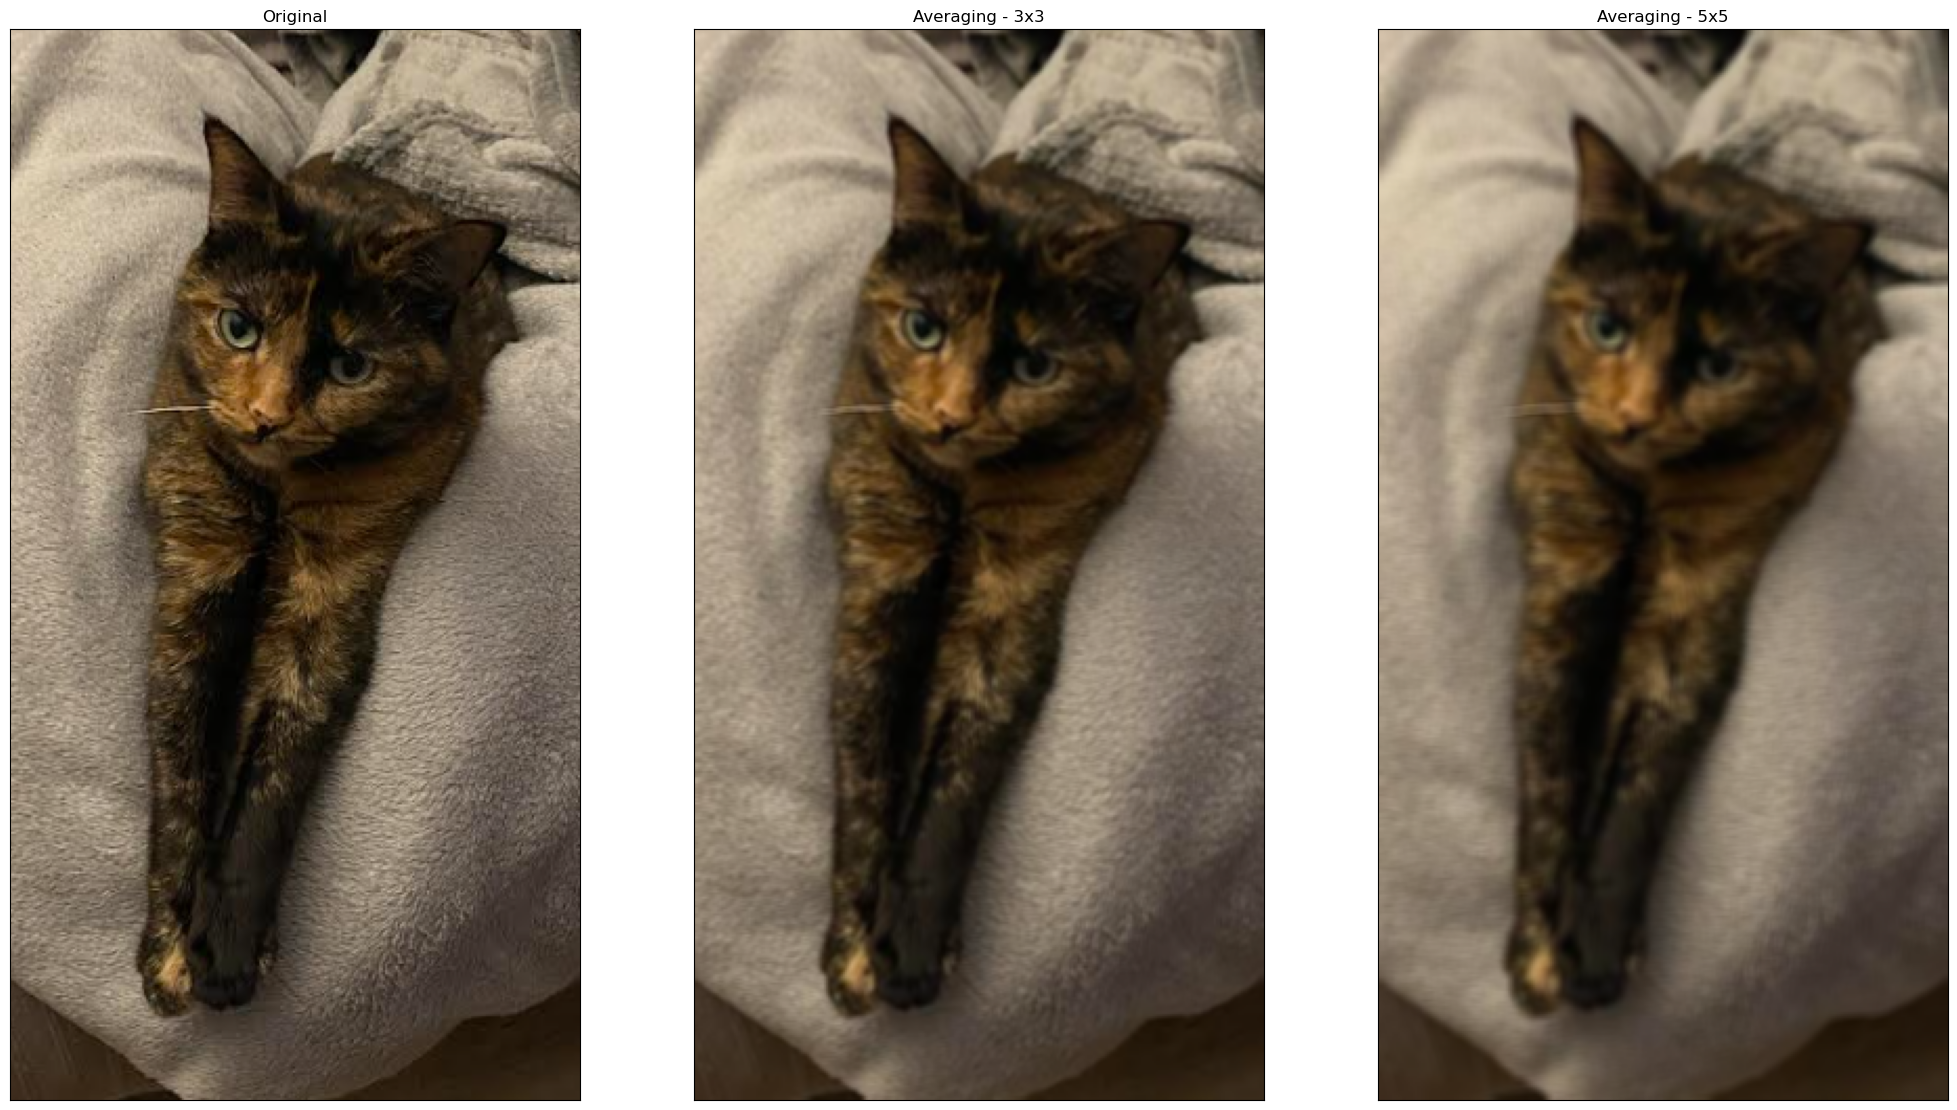

In [20]:
av3 = cv2.blur(img,(3,3))
av5 = cv2.blur(img,(5,5))

plt.gcf().set_size_inches(25,25)
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(av3),plt.title('Averaging - 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(av5),plt.title('Averaging - 5x5')
plt.xticks([]), plt.yticks([])
plt.show()

## Détection de bords

Avec une matrice toute simple de taille 3x3

In [34]:
noyau_contour = np.array([[0,1,0],[1,-10,1],[0,1,0]])

signal.convolve2d ne peut se faire que sur un seul canal, on peut en choisir un parmi les trois (rouge/vert/bleu)

In [42]:
img[:,:,1].shape

(511, 272)

In [91]:
img_conv_contour_r = signal.convolve2d(img[:,:,0],
                                noyau_contour,
                                boundary='symm',
                                mode='same'
                                )

In [92]:
img_conv_contour_r.shape

(511, 272)

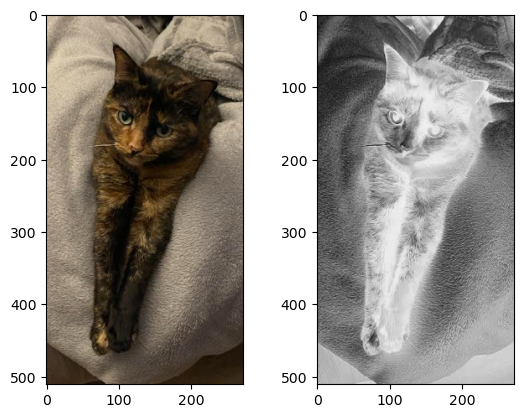

In [93]:
affichage_deux_imgs(img, img_conv_contour_r)

Petit exercice : modifier la valeur centrale du noyau pour voir les effets sur l'image convoluée

# Augmentation des contrastes

In [47]:
contraste = np.array([[0,0,0,0,0], 
                    [0,1,1,1,0], 
                    [0,1,1,1,0], 
                    [0,1,1,1,0], 
                    [0,0,0,0,0]])


img_contraste = signal.convolve2d(img[:,:,0], 
                        contraste, 
                        boundary='symm', 
                        mode='same')

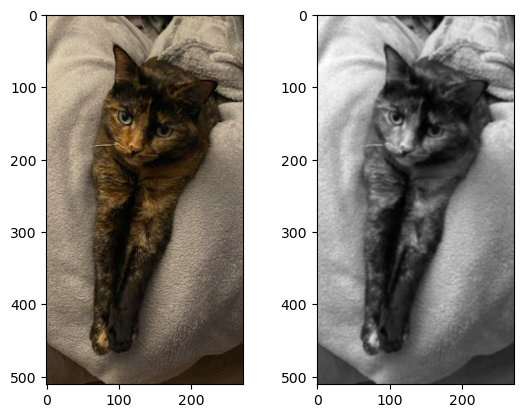

In [48]:
affichage_deux_imgs(img, img_contraste)

# Augmenter les bords 

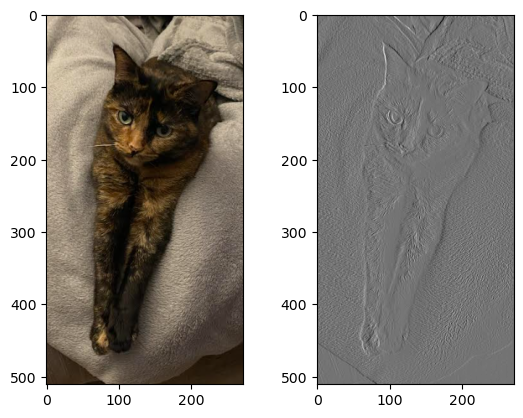

In [99]:
bords = np.array([[0,0,0], 
                   [-1,1,0,], 
                   [0,0,0,]])


img_bord = signal.convolve2d(img[:,:,0], 
                        bords, 
                        boundary='symm', 
                        mode='same')
affichage_deux_imgs(img, img_bord)